<a href="https://colab.research.google.com/github/Shinhunjun/Data-Analysis_Study/blob/main/22_11_20(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [3]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


-----

In [4]:
df.shape

(506, 17)

In [5]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [7]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

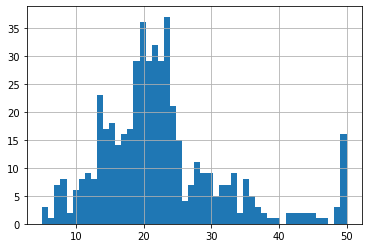

In [8]:
df['CMEDV'].hist(bins=50)

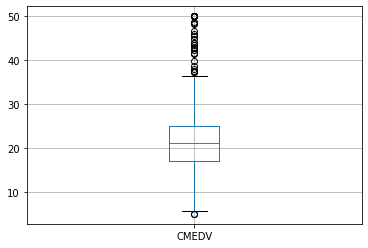

In [9]:
df.boxplot(column=['CMEDV'])

-----

##### 설명 변수들의 분포 탐색

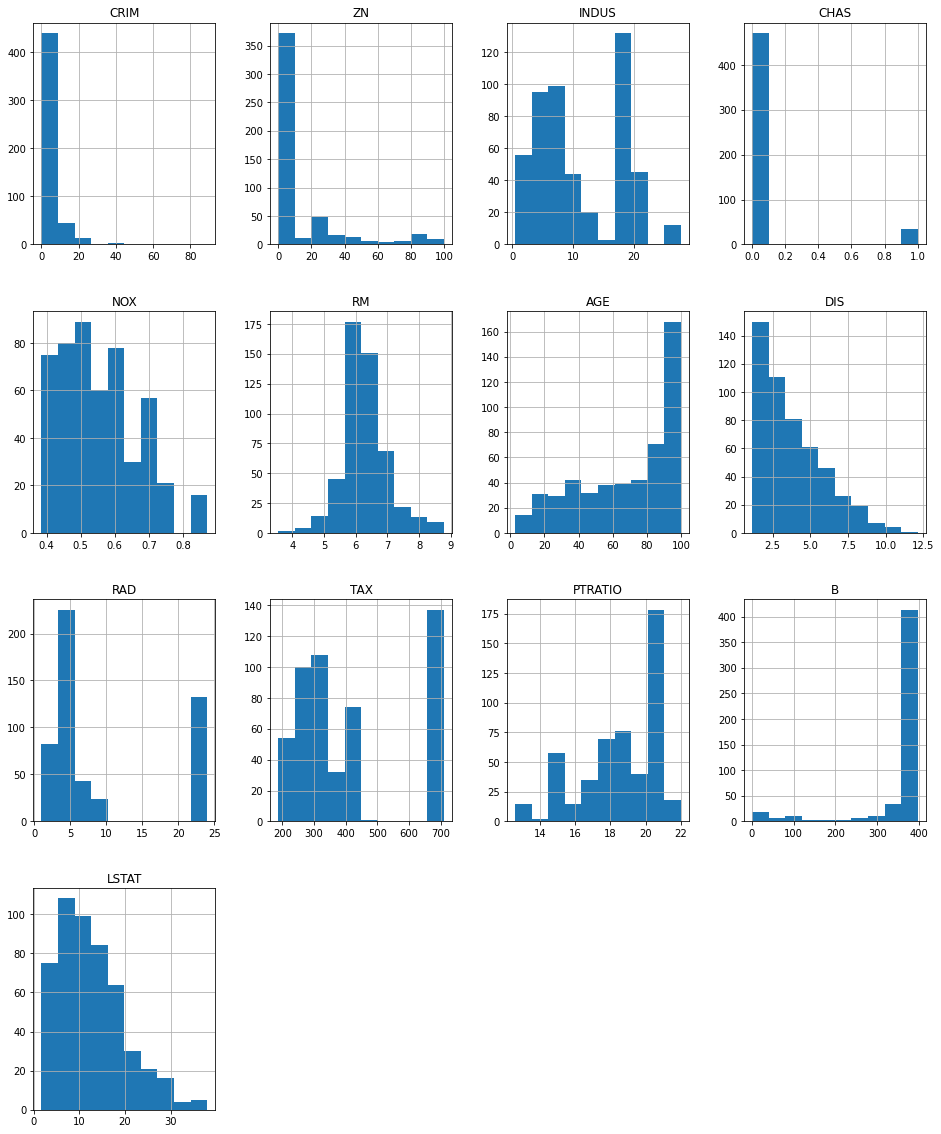

In [10]:
numerical_columns = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
fig= plt.figure(figsize=(16,20))
ax= fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

In [11]:
cois=['CMEDV','CRIM', 'ZN', 'INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
corr= df[cois].corr(method='pearson')

In [12]:
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


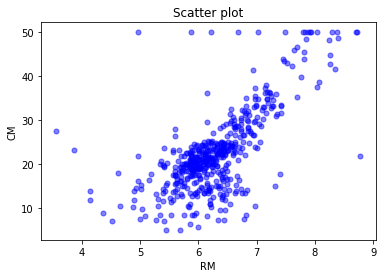

In [13]:
plt.plot('RM','CMEDV',data=df, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("RM")
plt.ylabel("CM")
plt.show()

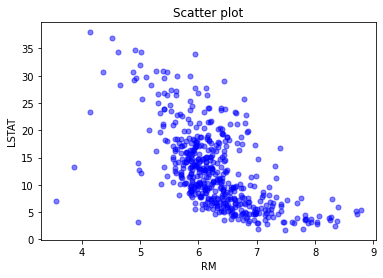

In [14]:
plt.plot('RM','LSTAT',data=df, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("RM")
plt.ylabel("LSTAT")
plt.show()

##### 지역별 차이 탐색

In [15]:
df['TOWN'].value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Medfield              1
Dover                 1
Lincoln               1
Sherborn              1
Nahant                1
Name: TOWN, Length: 92, dtype: int64

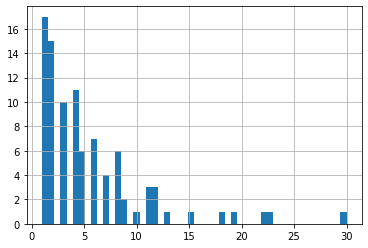

In [16]:
df['TOWN'].value_counts().hist(bins=50)

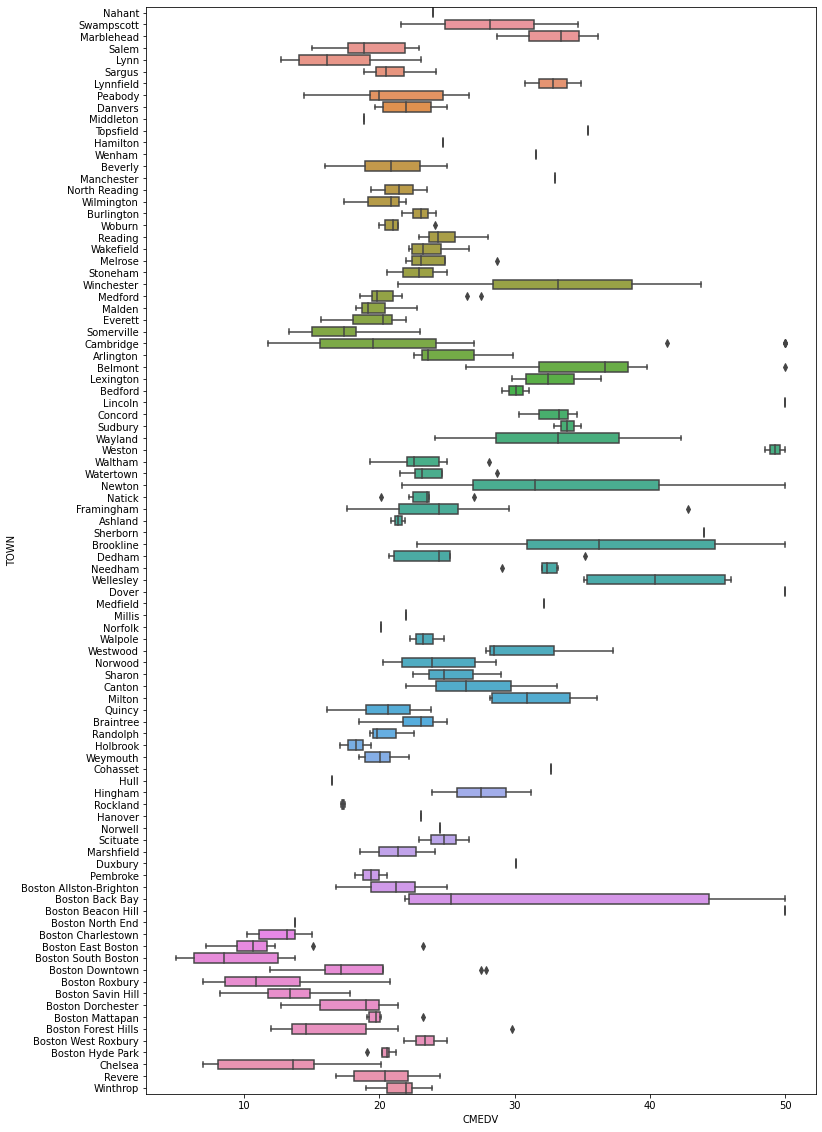

In [17]:
fig=plt.figure(figsize=(12,20))
ax=fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)

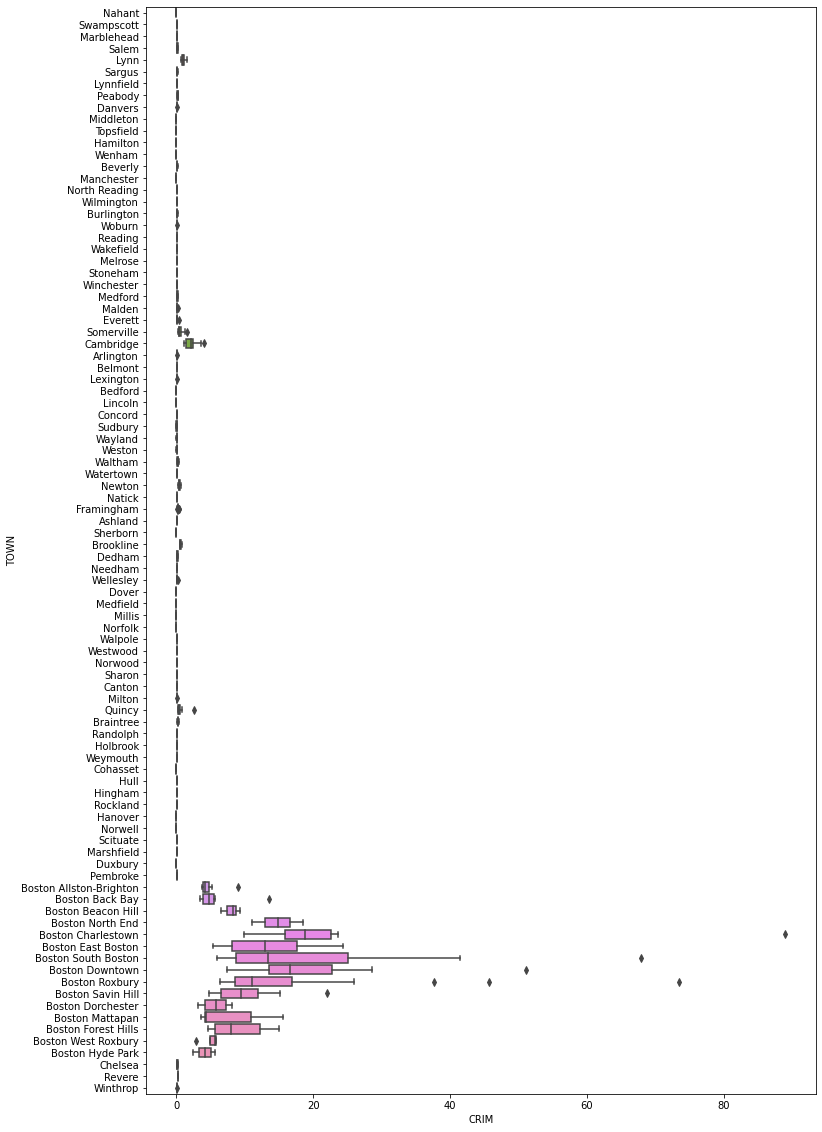

In [18]:
fig=plt.figure(figsize=(12,20))
ax=fig.gca()
sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

-----

##### 피처 표준화

In [68]:
from sklearn.preprocessing import StandardScaler
#feature standardization
scaler = StandardScaler()
scale_columns=['CMEDV','CRIM', 'ZN', 'INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
df[scale_columns]=scaler.fit_transform(df[scale_columns])

In [69]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,0.160376,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,-0.101258,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,1.326830,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,1.185112,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,1.490352,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


##### 데이터셋 분리

In [70]:
from sklearn.model_selection import train_test_split

X= df[scale_columns]
y= df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

In [71]:
X_train.shape

(404, 14)

-----

In [72]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [73]:
lr=linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [74]:
print(lr.coef_)

[ 1.00000000e+00  5.27219700e-16 -3.89260943e-16  3.97251256e-16
 -2.71779942e-16  5.71383680e-16 -9.71235764e-16  6.47316995e-16
 -4.57146480e-16  5.09276266e-16  5.46887167e-16  5.70101062e-16
 -3.43544940e-16  6.34198620e-16]


In [75]:
plt.rcParams['figure.figsize']=[12,16]

coefs=lr.coef_.tolist()
coefs_series = pd.Series(coefs)

-----

In [40]:
print(model.score(X_train, y_train))

1.0


In [41]:
print(model.score(X_test, y_test))

1.0


In [47]:
y_predictions= lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

y_predictions= lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

3.4312074942597815e-15
4.011721504954848e-15


In [52]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.953e+30
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:15:30   Log-Likelihood:                 12921.
No. Observations:                 404   AIC:                        -2.581e+04
Df Residuals:                     389   BIC:                        -2.575e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.176e-16   1.59e-16     -3.890      0.000    -9.3e-16   -3.05e-16
CMEDV          1.0000    3.1e-16   3.22e+15      0.000       1.000       1.000
CRIM        2.706e-16   2.03e-16      1.335      0.183   -1.28e-16    6.69e-16
ZN         -4.753e-16   2.39e-16     -1.986      0.048   -9.46e-16   -4.81e-18
INDUS       6.523e-16   3.14e-16      2.077      0.038    3.49e-17    1.27e-15
CHAS        3.678e-16   1.61e-16      2.286      0.023    5.15e-17    6.84e-16
NOX         6.176e-16   3.48e-16      1.776      0.076    -6.6e-17     1.3e-15
RM          -2.22e-16   2.38e-16     -0.933      0.351    -6.9e-16    2.46e-16
AGE         1.943e-16   2.74e-16      0.709      0.479   -3.45e-16    7.33e-16
DIS        -4.025e-16   3.46e-16     -1.163      0.246   -1.08e-15    2.78e-16
RAD        -3.192e-16   4.45e-16     -0.717      0.474   -1.19e-15    5.56e-16
TAX         3.331e-16   4.86e-16      0.686      0.493   -6.22e-16    1.29e-15
PTRATIO     4.302e-16   2.17e-16      1.983      0.048    3.58e-18    8.57e-16
B          -5.551e-17   1.98e-16     -0.281      0.779   -4.44e-16    3.33e-16
LSTAT       3.851e-16   3.05e-16      1.262      0.208   -2.15e-16    9.85e-16
==============================================================================
Omnibus:                       28.011   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.529
Skew:                           0.074   Prob(JB):                      0.00517
Kurtosis:                       2.223   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 다중 공선성

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Facotr"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

In [67]:
vif.head()

,VIF Facotr
0,1.732212
1,2.222153
2,3.861904
3,1.076311
4,4.447534
